In [1]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels, get_apds_shifts
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
os.listdir(LOC['data'])

['scan_1.dump',
 'anti_b_2_0.dump',
 'power_broad_pulse_0.dump',
 'fibers',
 'wierd_shit_0.dump',
 'rabi____aa_1.dump',
 'pi_pulse_1.dump',
 'st_off_molecule_0.dump',
 'scan_3.dump',
 'pressure_shift2',
 'st_on_molecule_0.dump',
 'molecule_no_filter_0.dump',
 'resonant_filtering.dump',
 'pi_pulse_0.dump',
 'high_rr_st_on_molecule_0.dump',
 'fiber_gauss_1.dump',
 'fiber_stick',
 'fiber_gauss_0.dump',
 'scan_0.dump',
 'st_on_molecule_1.dump',
 'pressure_shift',
 'rabi_good_1_0.dump',
 'rabi____aaaaaa_0.dump',
 'proper_rabis_0.dump',
 'somenottoobad_2.dump',
 'high_rr_st_on_molecule_1.dump',
 '_default_4.dump',
 'scan_with_molecule_pix_trig_0.dump',
 'scan_2.dump',
 'rabi_1.dump',
 'high_rr_st_on_molecule_2.dump',
 'fiber_lens_prep',
 'rabi____lower_4_0.dump',
 'rabi____lower_1_0.dump',
 'anti_b_1_0.dump',
 'molecule_no_filter_1.dump',
 'rabi____aa_0.dump',
 'rabi____lower_5_0.dump',
 'rabi____lower_2_0.dump',
 'moll_0.dump',
 'rabi____lower_3_0.dump']

In [9]:
dump_name="high_rr_st_on_molecule_2.dump"
dump = f"{LOC['data']}/{dump_name}"
data = get_dump(dump)
trig = get_trig_len(data)
data = assign_trigs_to_clicks(data, trig=trig, channels=[1,2,3,4])
shifts = get_apds_shifts(data, trig=trig)
data = get_dump(dump).copy()
data = shift_channels(data, 300_000, [1,2,3,4])
for idx,sh in enumerate(shifts):
    data = shift_channels(data, sh, [idx+1])
data = assign_trigs_to_clicks(data, trig=trig, channels=[1,2,3,4], return_trig=True)

In [10]:
np.unique(data['channel'])

array([1, 2, 3, 4, 5], dtype=int32)

In [67]:
import random

In [123]:
indc = np.arange(data.shape[0])[data['channel'] != 5]
trigsI = np.arange(data.shape[0])[data['channel'] == 5]
rand = random.sample(list(indc), int(len(data[data['channel']!=5])/2))
indRand = np.concatenate((rand, trigsI))
indRand = np.sort(indRand)

In [124]:
dat_trig = np.split(data[indRand], np.where(data[indRand]['channel'] == 5)[0])

singles = np.concatenate(list(filter(lambda x: len(x) == 2, dat_trig)))
singles = singles[singles['channel'] !=5]

doubles = np.concatenate(list(filter(lambda x: (len(x[x['channel'] != 5]) == 2), dat_trig)))
doubles = np.reshape(doubles, (int(len(doubles)/3), 3))[:,1:]

tripples = np.concatenate(list(filter(lambda x: (len(x[x['channel'] != 5]) == 3), dat_trig)))
tripples = np.reshape(tripples, (int(len(tripples)/4), 4))[:,1:]

doubles_c = np.array(list(filter(lambda x: (x[0]['channel'] == 1) and (x[1]['channel'] == 2),doubles)))

tripples_c = np.array(list(filter(lambda x: (x[0]['channel'] == 2),tripples)))

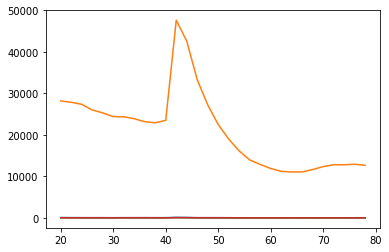

In [125]:
d2, x = np.histogram(np.concatenate(doubles_c['time_from_trig']), bins=30, range=(20000, 80000))
plt.plot(x[:-1]/1000, d2)
d1, x = np.histogram(singles['time_from_trig'][singles['channel']==1], bins=30, range=(20000, 80000))
plt.plot(x[:-1]/1000, d1)
d21, x = np.histogram(doubles_c['time_from_trig'][:, 0], bins=30, range=(20000, 80000))
plt.plot(x[:-1]/1000, d21)
d22, x = np.histogram(doubles_c['time_from_trig'][:, 1], bins=30, range=(20000, 80000))
plt.plot(x[:-1]/1000, d22)

In [126]:
eta = (d21/d22) * (d2/d1)
print(eta)

[0.00315752 0.00424517 0.00310489 0.0031562  0.00327994 0.00352875
 0.00452224 0.00319406 0.00405687 0.00274241 0.00423913 0.0025284
 0.00262791 0.00183408 0.00308781 0.00368771 0.00172416 0.00261078
 0.00184114 0.00294253 0.00313094 0.00510726 0.00365038 0.00296338
 0.00320543 0.00290721 0.00344086 0.00335856 0.0046468  0.00529752]


In [122]:
eta = (d21/d22) * (d2/d1)
print(eta)

[0.00778861 0.00822447 0.0061179  0.00545202 0.00670937 0.00492899
 0.00781779 0.00643053 0.00616992 0.0058173  0.00643374 0.00671993
 0.00622166 0.00515134 0.00618943 0.00614937 0.00563516 0.00575105
 0.0057468  0.00621978 0.00735656 0.00605168 0.00773181 0.00667
 0.00589909 0.00761238 0.00726655 0.0067554  0.00885095 0.00850511]


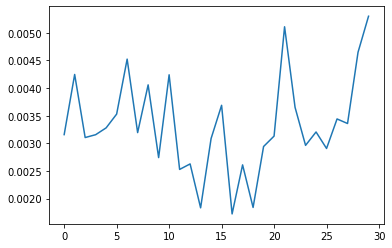

In [127]:
plt.plot(eta)

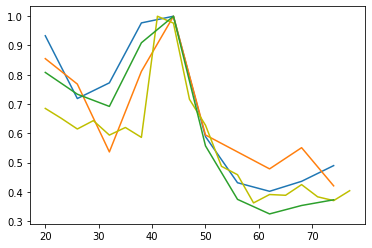

In [108]:
y1, x = np.histogram(doubles_c['time_from_trig'][:, 0], bins=10, range=(20000, 80000))
plt.plot(x[:-1]/1000, y1/max(y1))
y3, x = np.histogram(tripples_c['time_from_trig'][:, 0], bins=10, range=(20000, 80000))
plt.plot(x[:-1]/1000, y3/max(y3))
y2, x = np.histogram(doubles_c['time_from_trig'][:, 1], bins=20, range=(20000, 80000))
plt.plot(x[:-1]/1000, y2/max(y2), 'y')
y0, x = np.histogram(singles['time_from_trig'][singles['channel']==1], bins=10, range=(20000, 80000))
plt.plot(x[:-1]/1000, y0/max(y0))


In [103]:
min(y1/y0)

0.0028228940801047334

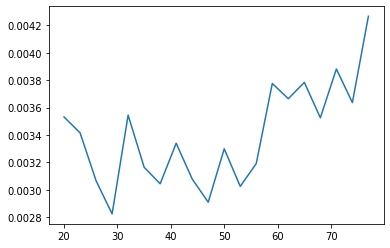

In [33]:
plt.plot(x[:-1]/1000, y1/y0)

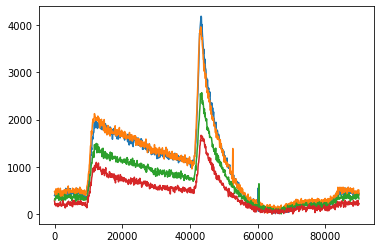

In [5]:
for ch in [1,2,3,4]:
    y, x = np.histogram(data['time_from_trig'][data['channel']==ch], bins=1000, range=(0, trig))
    plt.plot(x[:-1], y - np.min(y))

229

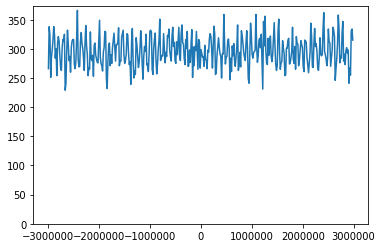

In [6]:
corr_window = 3000000
autoc_diffs_tot, autoc_diffs = correlation(data, 
                                           start_chs=[1],
                                           stop_chs=[2],
                                           corr_window=corr_window)
a = np.concatenate(autoc_diffs)
y, x = np.histogram(a, bins=400, range=(-corr_window, corr_window))
plt.plot(x[:-1], y)
plt.ylim(0)
np.min(y)

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [8]:
@interact_manual
def show_articles_more_than(x=(0, 100_000, 10), y=(0, 100_000, 10)):
    fig, axes = plt.subplots(1, 2, sharey=False, gridspec_kw={'wspace': 0.01}, figsize=(10,5))
    data2 = data[(data['time_from_trig'] > x) &(data['time_from_trig'] < y)]
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==1], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'r')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==2], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'b')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==3], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'g')
    y, x = np.histogram(data2['time_from_trig'][data2['channel']==4], bins=1000, range=(0, trig))
    axes[0].plot(x[:-1], y, 'k')
    corr_window = 3000000
    autoc_diffs_tot, autoc_diffs = correlation(data2, 
                                               start_chs=[1],
                                               stop_chs=[2],
                                               corr_window=corr_window)
    a = np.concatenate(autoc_diffs)
    y, x = np.histogram(a, bins=400, range=(-corr_window, corr_window))
    axes[1].plot(x[:-1], y)
    axes[1].set_ylim(0)

interactive(children=(IntSlider(value=50000, description='x', max=100000, step=10), IntSlider(value=50000, des…